In [23]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [24]:
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [25]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [27]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [28]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [59]:
univariate_column_label=['AEDAHO_T9_V2']
univariate_data_set=test_new.iloc[200:700][univariate_column_label] #just for checking whether it is working or not
print(univariate_data_set.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 16:54:00     42.040317
2019-04-11 16:53:00     42.105153
2019-04-11 16:52:00     42.097709
2019-04-11 16:51:00     42.127110
2019-04-11 16:50:00     42.001027


In [60]:
univariate_data=univariate_data_set.loc[::-1]
print(univariate_data.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 08:14:00     42.152661
2019-04-11 08:15:00     42.268855
2019-04-11 08:16:00     43.134080
2019-04-11 08:17:00     42.618975
2019-04-11 08:18:00     42.481211


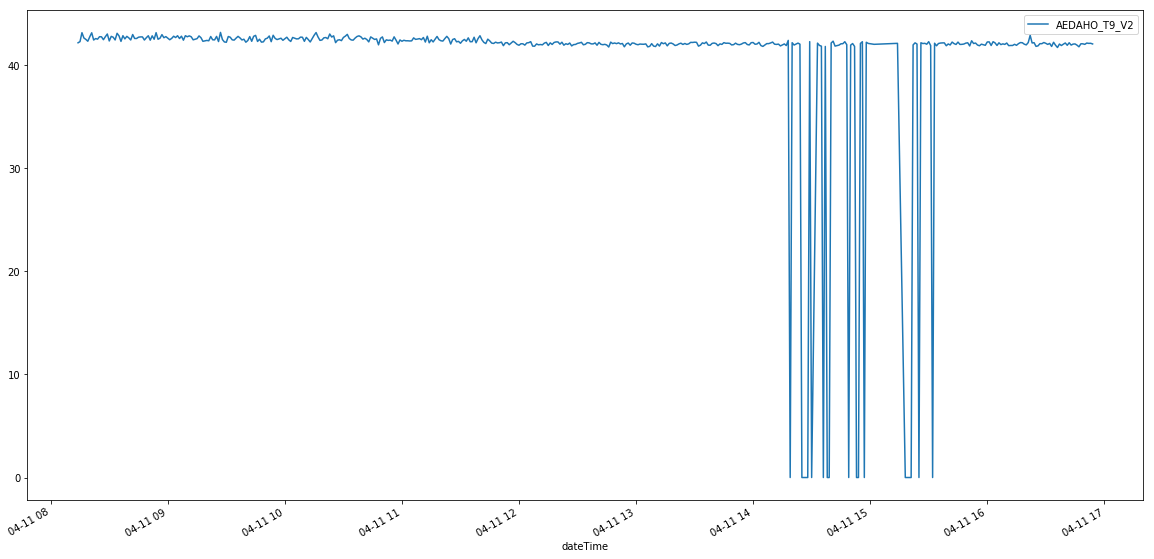

In [61]:
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [62]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
univariate_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,univariate_mean)

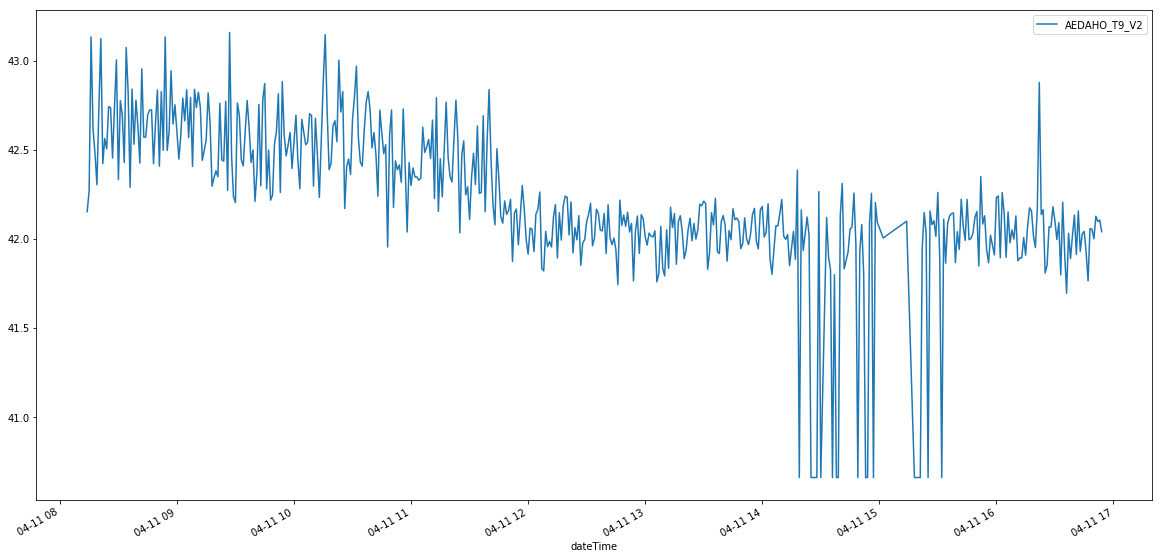

In [63]:
univariate_data_mean.plot()
plt.show()

In [64]:
# Determining rolling statistics
n=60
rolmean = univariate_data_mean.rolling(window=n).mean()

rolstd = univariate_data_mean.rolling(window=n).std()

# print('rolmean: ',rolmean,'\nrolstd: ',rolstd)

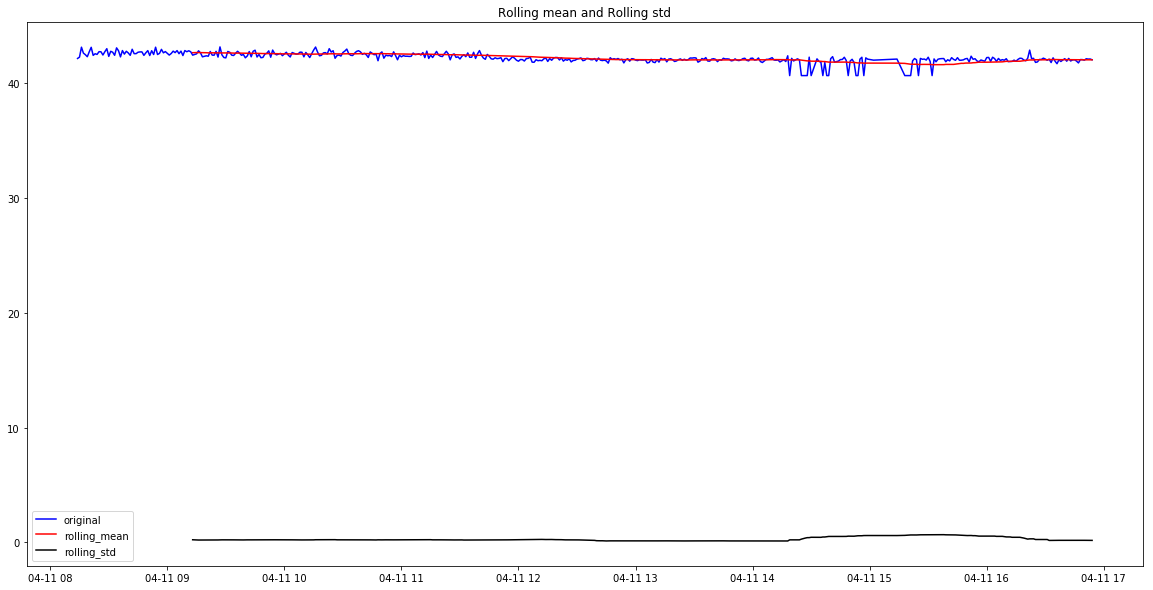

In [65]:
orig=plt.plot(univariate_data_mean,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling_mean')
std=plt.plot(rolstd,color='black',label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std')
plt.show(block=False)

In [66]:
# Perform DIckey fuller test

# univariate_data_mean = univariate_data

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller test: ')

dftest=adfuller(univariate_data_mean['AEDAHO_T9_V2'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P_value','#Lags_used','Numbers of observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value

    
print(dfoutput)

Results of Dickey Fuller test: 
Test Statistics                  -1.869182
P_value                           0.346695
#Lags_used                       17.000000
Numbers of observations used    482.000000
Critical value(1%)               -3.443990
Critical value(5%)               -2.867555
Critical value(10%)              -2.569974
dtype: float64


In [67]:
print(univariate_data.head())
print(univariate_data_mean.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 08:14:00     42.152661
2019-04-11 08:15:00     42.268855
2019-04-11 08:16:00     43.134080
2019-04-11 08:17:00     42.618975
2019-04-11 08:18:00     42.481211
                     AEDAHO_T9_V2
dateTime                         
2019-04-11 08:14:00     42.152661
2019-04-11 08:15:00     42.268855
2019-04-11 08:16:00     43.134080
2019-04-11 08:17:00     42.618975
2019-04-11 08:18:00     42.481211


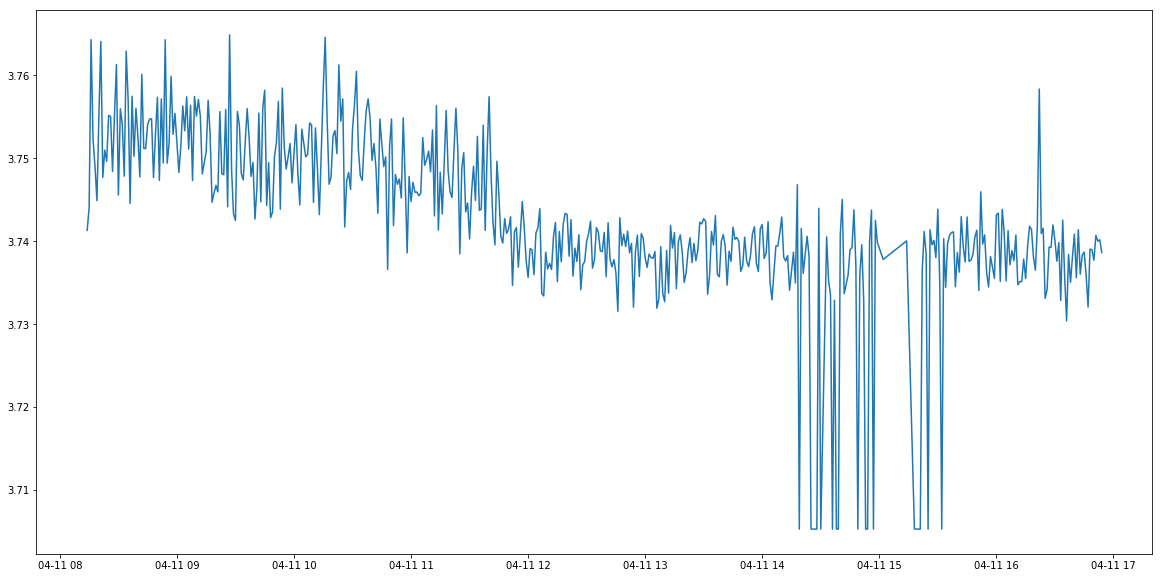

In [68]:
univariate_data_mean_logscale=np.log(univariate_data_mean)
plt.plot(univariate_data_mean_logscale)

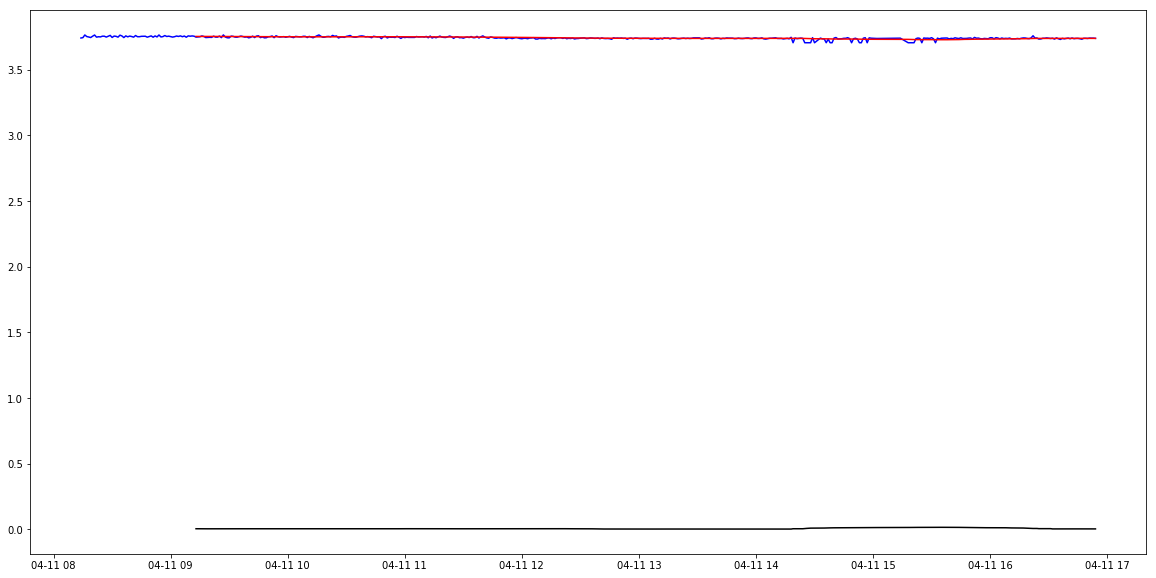

In [69]:
n = 60
movingAverage=univariate_data_mean_logscale.rolling(window=n).mean()
movingStd=univariate_data_mean_logscale.rolling(window=n).std()

plt.plot(univariate_data_mean_logscale,color='blue')
plt.plot(movingAverage,color='red')
plt.plot(movingStd,color='black')

In [70]:
datasetLogScaleMinusMovingAverage=univariate_data_mean_logscale - movingAverage
# datasetLogScaleMinusMovingAverage.head(60)

In [71]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
# datasetLogScaleMinusMovingAverage.head(60)

In [72]:
from statsmodels.tsa.stattools import adfuller
n = 60
def test_stationarity(timeseries):
    global n
    movingAverage=timeseries.rolling(window=n).mean()
    movingStd=timeseries.rolling(window=n).std()
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='rolling_mean')
    std=plt.plot(movingStd,color='black',label='rolling_std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling std')
    plt.show(block=False)
    
    
    print('Results of Dickey Fuller test: ')

    dftest=adfuller(timeseries['AEDAHO_T9_V2'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P_value','#Lags_used','Numbers of observations used'])

    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value

    print(dfoutput)

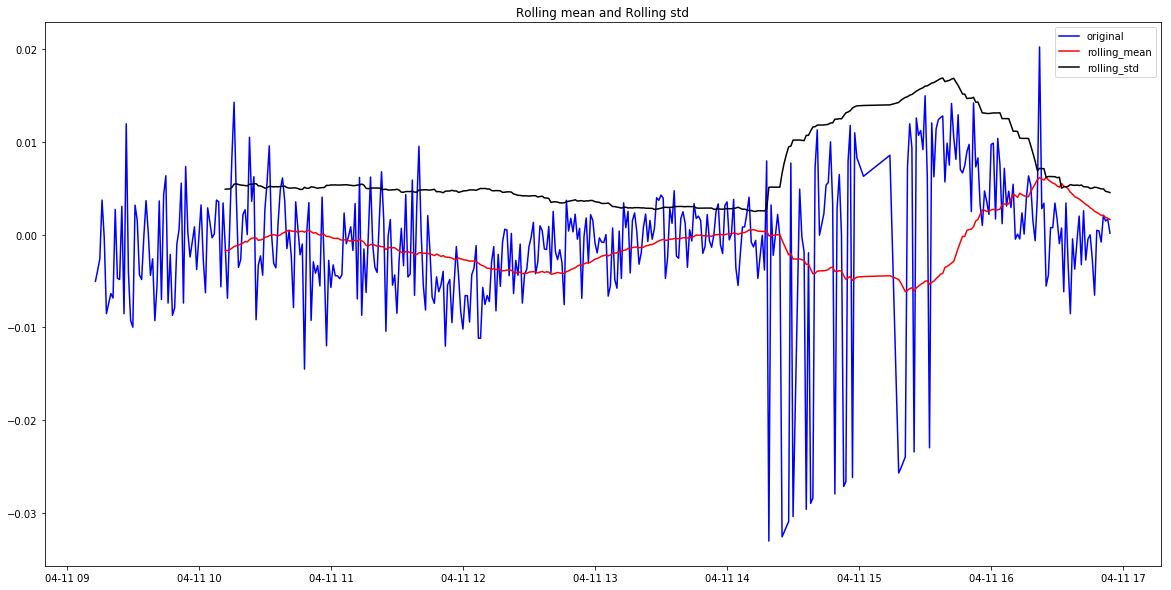

Results of Dickey Fuller test: 
Test Statistics                  -3.539542
P_value                           0.007028
#Lags_used                       17.000000
Numbers of observations used    423.000000
Critical value(1%)               -3.445904
Critical value(5%)               -2.868397
Critical value(10%)              -2.570423
dtype: float64


In [73]:
test_stationarity(datasetLogScaleMinusMovingAverage)

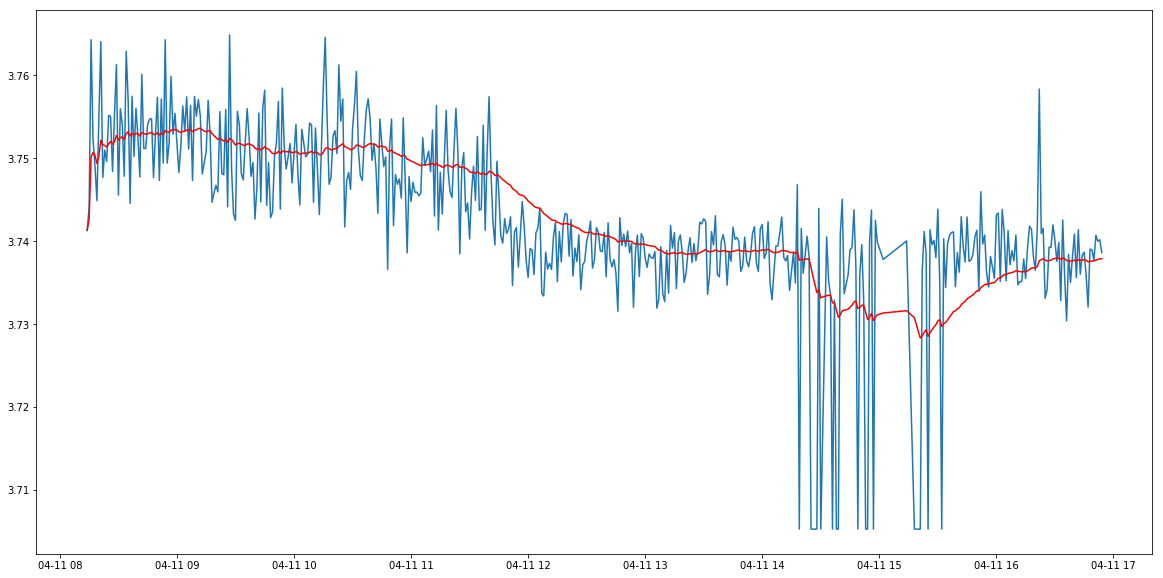

In [74]:
# exponentialDecayWeightedAverage=univariate_data_mean_logscale.ewm(halflife=n,min_periods=0,adjust=True).mean()
exponentialDecayWeightedAverage = univariate_data_mean_logscale.ewm(span=60).mean()
plt.plot(univariate_data_mean_logscale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [75]:
datasetLogScaleMinusMovingExponentialDecayAverage=univariate_data_mean_logscale - exponentialDecayWeightedAverage

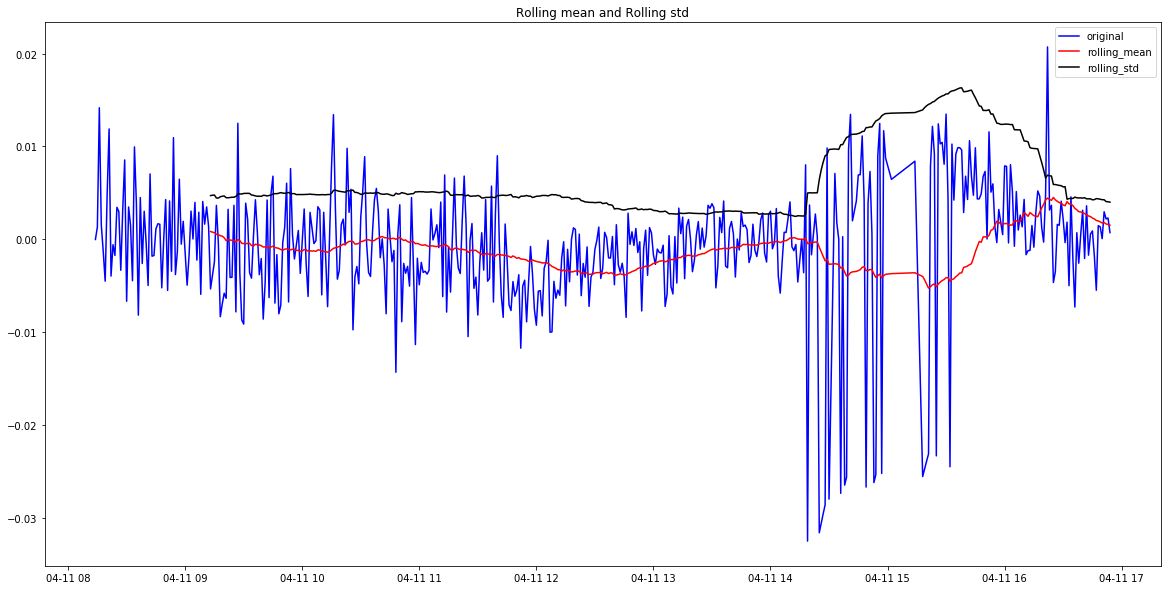

Results of Dickey Fuller test: 
Test Statistics                  -3.979015
P_value                           0.001524
#Lags_used                       17.000000
Numbers of observations used    482.000000
Critical value(1%)               -3.443990
Critical value(5%)               -2.867555
Critical value(10%)              -2.569974
dtype: float64


In [76]:
datasetLogScaleMinusMovingExponentialDecayAverage.dropna(inplace=True)
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

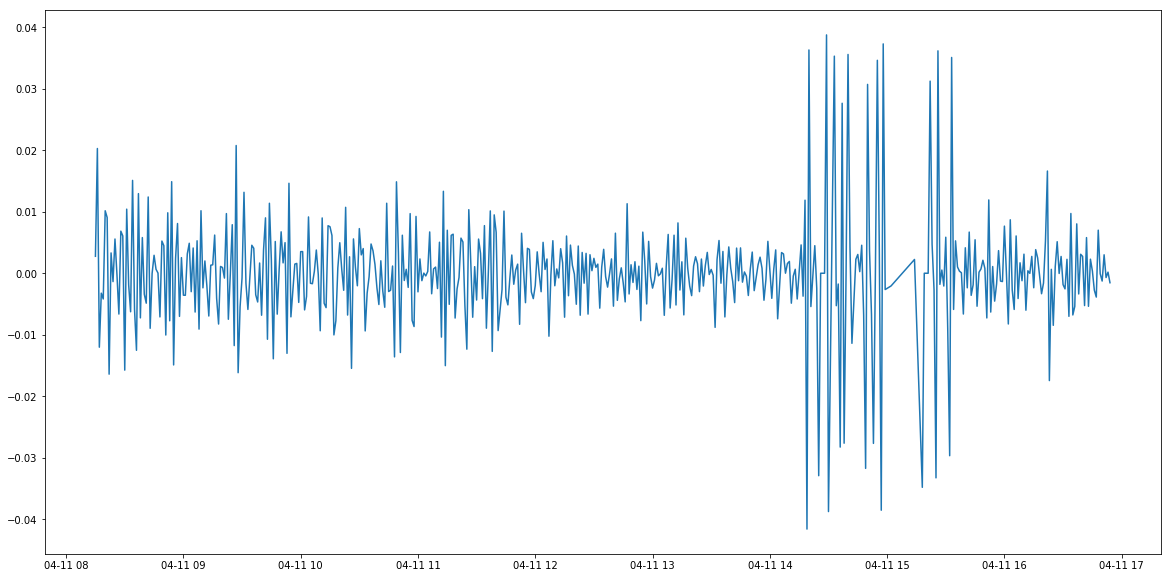

In [77]:
datasetLogDiffShifting=univariate_data_mean_logscale - univariate_data_mean_logscale.shift()
plt.plot(datasetLogDiffShifting)

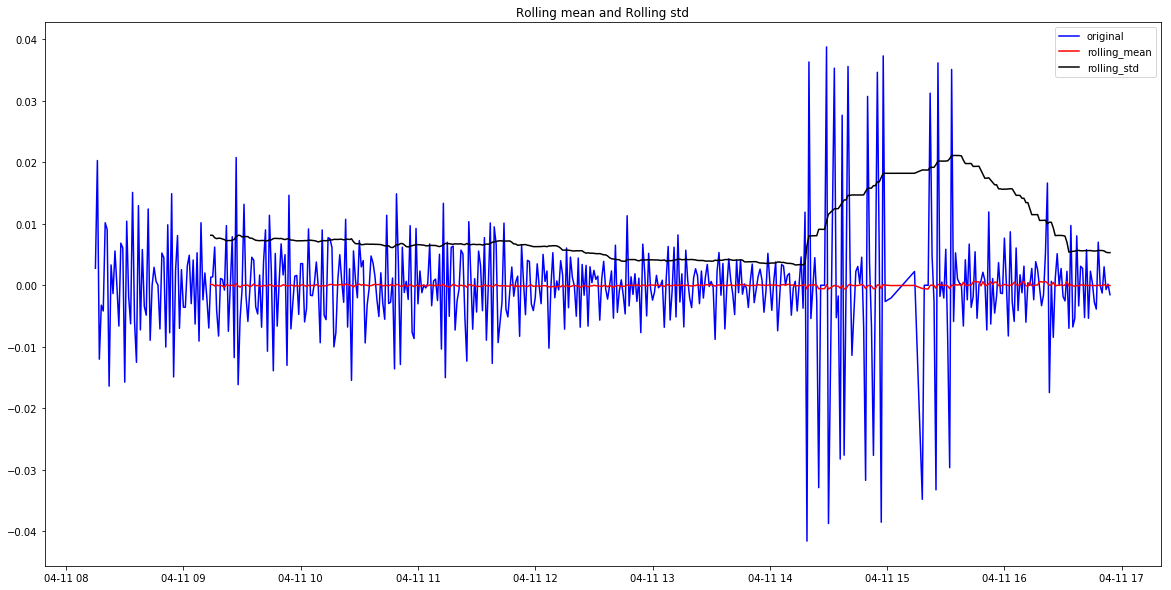

Results of Dickey Fuller test: 
Test Statistics                -8.877209e+00
P_value                         1.347853e-14
#Lags_used                      1.400000e+01
Numbers of observations used    4.840000e+02
Critical value(1%)             -3.443933e+00
Critical value(5%)             -2.867530e+00
Critical value(10%)            -2.569961e+00
dtype: float64


In [78]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


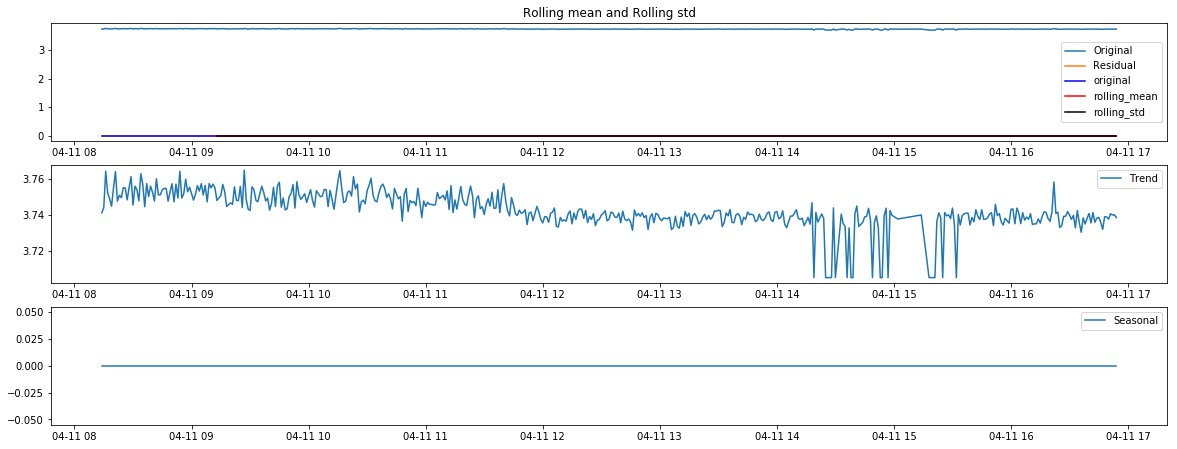

Results of Dickey Fuller test: 
Test Statistics                        NaN
P_value                                NaN
#Lags_used                        0.000000
Numbers of observations used    499.000000
Critical value(1%)               -3.443523
Critical value(5%)               -2.867350
Critical value(10%)              -2.569864
dtype: float64


C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(univariate_data_mean_logscale,freq=1)

trend = decomposition.trend
seasonal =decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(univariate_data_mean_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(411)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

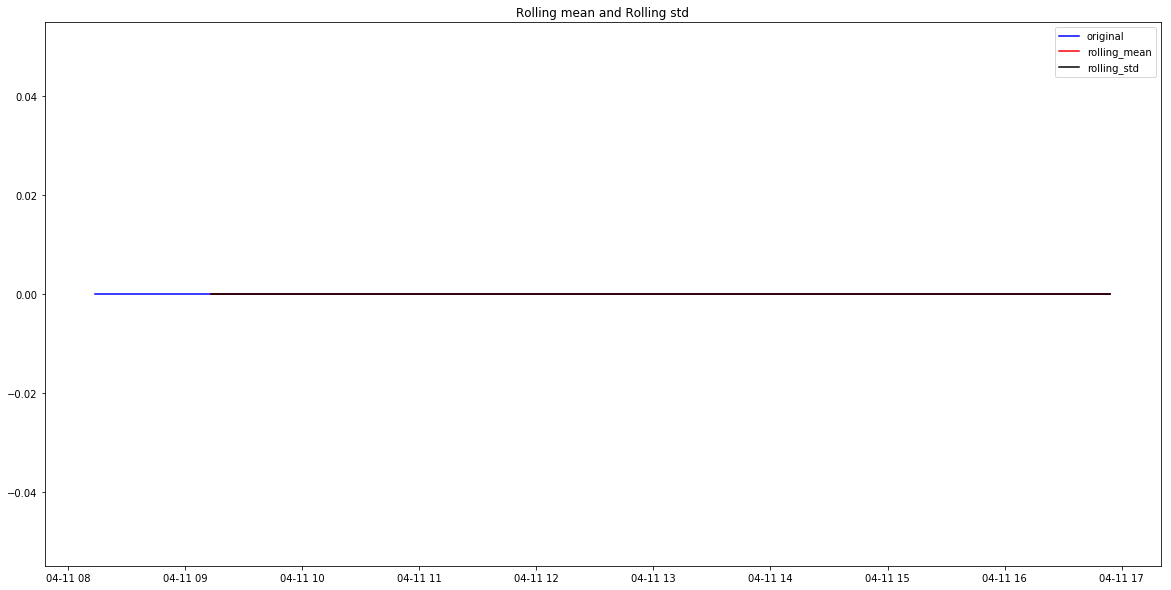

Results of Dickey Fuller test: 
Test Statistics                        NaN
P_value                                NaN
#Lags_used                        0.000000
Numbers of observations used    499.000000
Critical value(1%)               -3.443523
Critical value(5%)               -2.867350
Critical value(10%)              -2.569864
dtype: float64


C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [80]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

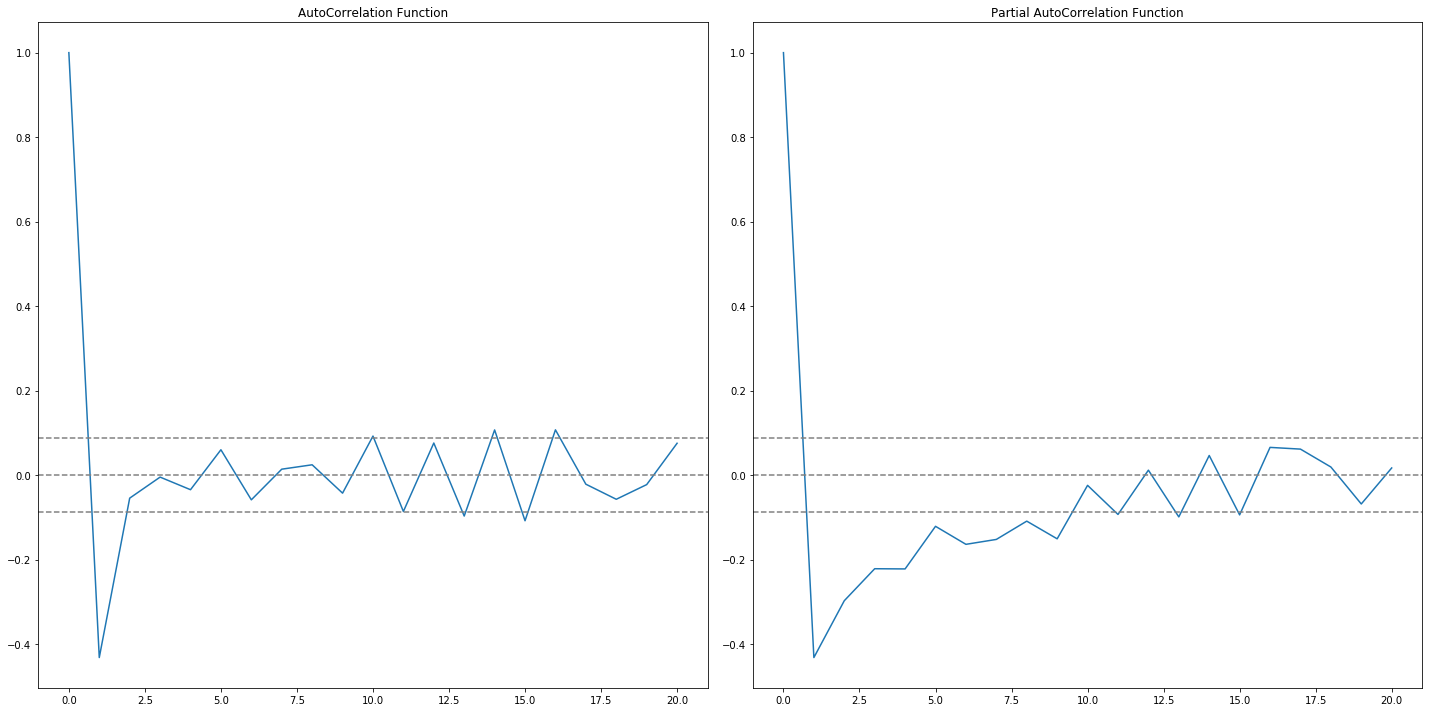

In [81]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

log_acf=acf(datasetLogDiffShifting,nlags=20)
log_pacf= pacf(datasetLogDiffShifting,nlags=20, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

#plot PACF

plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


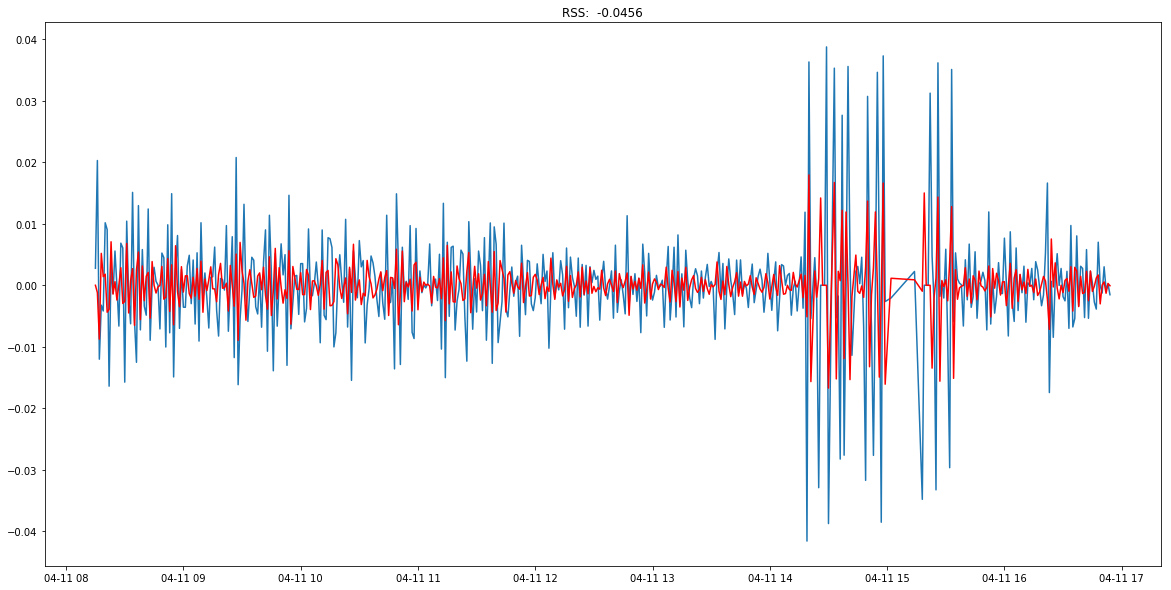

In [82]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

#AR model

model =ARIMA(univariate_data_mean_logscale,order=(1,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_AR.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting AR model')

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


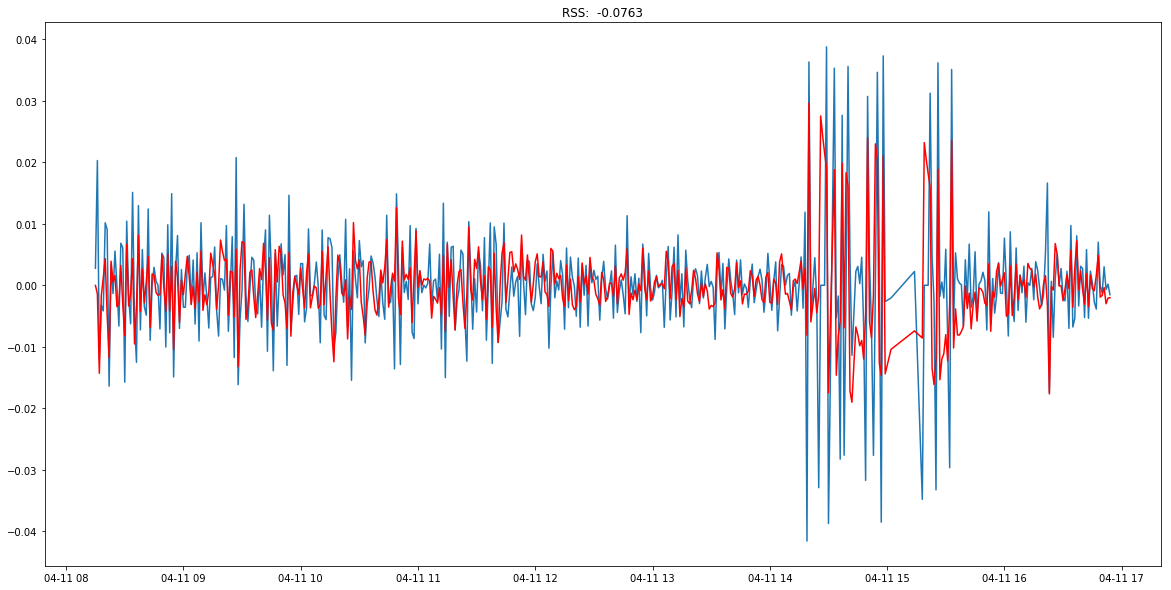

In [83]:
# MA model

model =ARIMA(univariate_data_mean_logscale,order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_MA.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting MA model')

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


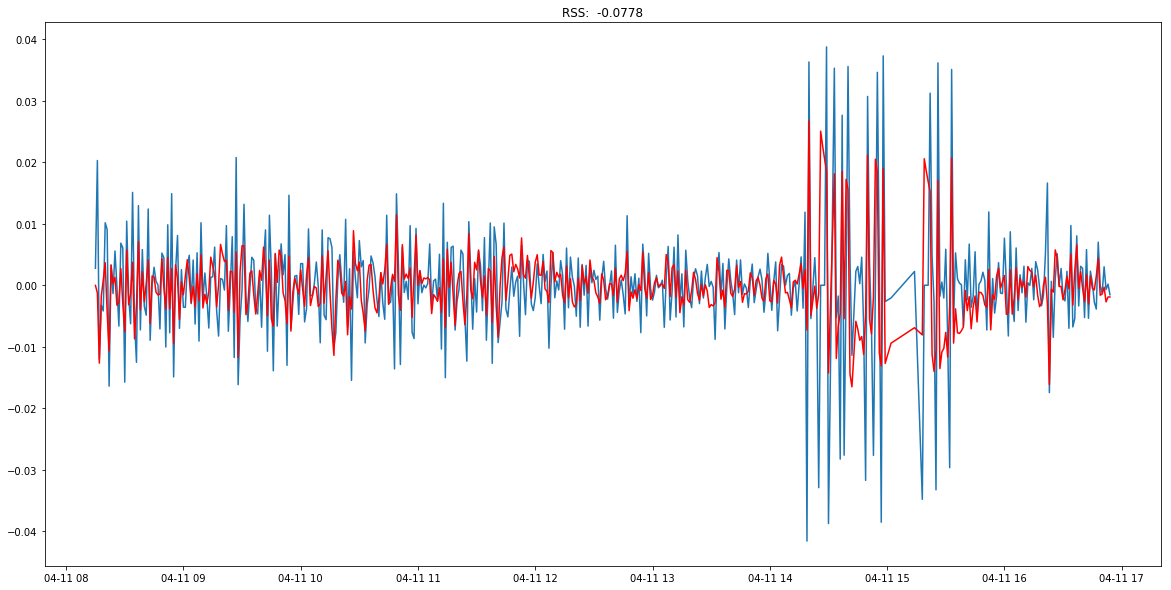

In [84]:


model =ARIMA(univariate_data_mean_logscale,order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_ARIMA.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting AR model')

In [85]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

dateTime
2019-04-11 08:15:00   -0.000028
2019-04-11 08:16:00   -0.001264
2019-04-11 08:17:00   -0.012650
2019-04-11 08:18:00   -0.001758
2019-04-11 08:19:00    0.000816
dtype: float64


In [86]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

dateTime
2019-04-11 08:15:00   -0.000028
2019-04-11 08:16:00   -0.001292
2019-04-11 08:17:00   -0.013942
2019-04-11 08:18:00   -0.015700
2019-04-11 08:19:00   -0.014884
dtype: float64


In [87]:
predictions_ARIMA_log = pd.Series(univariate_data_mean_logscale['AEDAHO_T9_V2'].ix[0], index=univariate_data_mean_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
print(predictions_ARIMA_log.head())

print(type(univariate_data_mean_logscale))
print(type(predictions_ARIMA_log))

dateTime
2019-04-11 08:14:00    3.741298
2019-04-11 08:15:00    3.741270
2019-04-11 08:16:00    3.740006
2019-04-11 08:17:00    3.727356
2019-04-11 08:18:00    3.725598
dtype: float64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


univariate_data_mean type:  <class 'pandas.core.frame.DataFrame'>
univariate_data_mean shape:  (500, 1) 	 size:  500
predictions_ARIMA type:  <class 'pandas.core.series.Series'>
predictions_ARIMA shape:  (500,) 	 size:  500


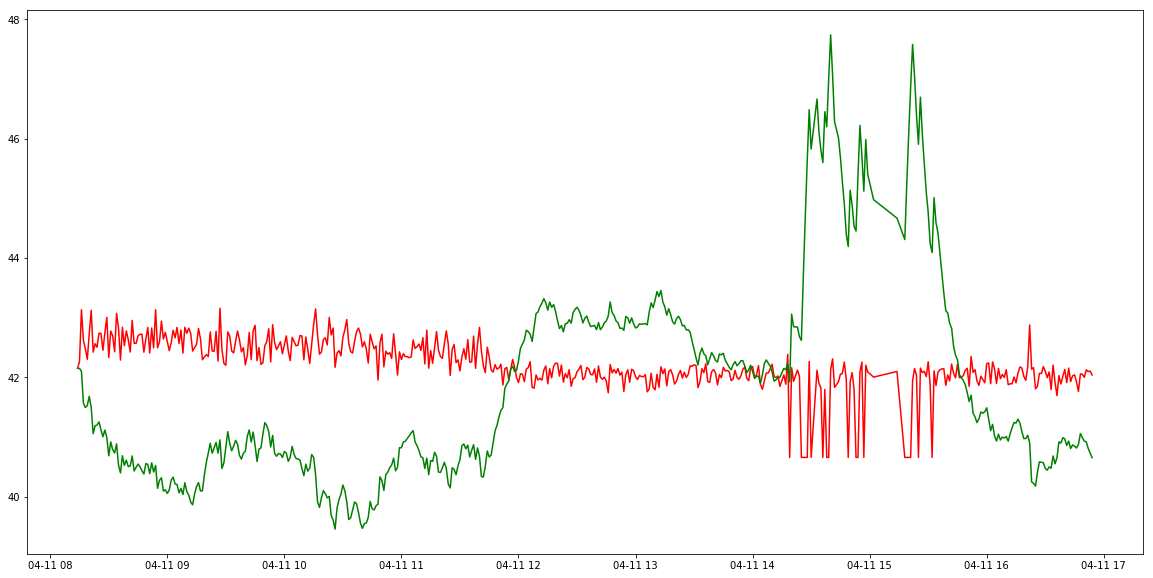

In [91]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(univariate_data_mean, color= 'red')
plt.plot(predictions_ARIMA, color = 'green')
# plt.plot(predictions_ARIMA_log, color = 'blue')
print('univariate_data_mean type: ', type(univariate_data_mean))
print('univariate_data_mean shape: ', univariate_data_mean.shape,'\t size: ', univariate_data_mean.size)

print('predictions_ARIMA type: ', type(predictions_ARIMA))
print('predictions_ARIMA shape: ', predictions_ARIMA.shape,'\t size: ', predictions_ARIMA.size)

In [93]:
print(type(univariate_data_mean_logscale))
# univariate_data_mean_logscale

<class 'pandas.core.frame.DataFrame'>


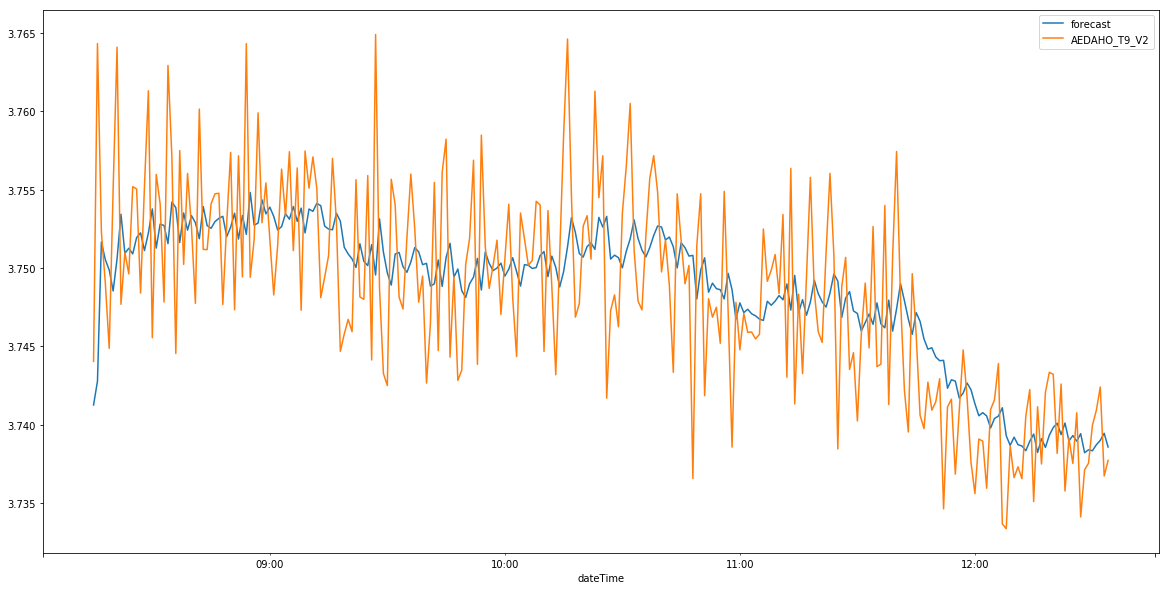

In [97]:
results_ARIMA.plot_predict(1,260)# 260 came how? look former output, 200 row. 200 + how many step??
x=results_ARIMA.forecast(steps=60)